# 데이터 분석에 앞서, 팀 소개와 인사말

In [105]:
from IPython.display import Image

In [ ]:
Image("PPT_IMG/00.표지_1.jpg")

#### 안녕하세요, 저희는 빅데이터를 분석하고자하는 열정으로 모인 5명의 학생, 끝판왕입니다.
#### 빅데이터를 위해 노력중인 모든 분들의 편에서 함께 노력하는 끝판왕 팀이 되겠습니다.

# Ⅰ 연구 개요

## 연구의 배경 및 필요성

In [ ]:
Image("PPT_IMG/04.배경및필요성_2.jpg")

- COVID-19(코로나바이러스 감염증-19, 이후 '코로나'로 통일)는 2019년 12월 중국을 시작으로 전세계로 퍼지며, 현재까지 크게 사회 및 경제적 변화, 생활 패턴의 변화 등을 비롯하여 실생활에 밀접한 영향을 주고있습니다.
- 코로나의 비말을 매개로 한 강력한 전파력은 사회적 거리두기를 필두로 사회 전반에 '언택트(비대면) 신드롬'을 불러일으키며 다양한 산업 분야의 판도를 좌지우지 하고 있습니다.
- 이에 따라 지속적으로 화두가 되고 있는 다양한 정부의 예방 정책들이 등장하였고, 코로나에 대응하기 위한 약 6개월의 시간과 데이터들이 축적되어 왔습니다.
- '포스트 코로나', 즉 코로나의 유행을 겪은 지금 이 시점에서  
`1) 코로나의 영향에 대한 다양한 분야의 데이터를 탐색하여 객관적인` **코로나의 영향력을 분석**하고,  
2) 현재까지 지속되고 있는 `다양한 대응책에 대한` **중간 검토를 통해 향후 더 나은 방향성 제시에 지표**`가 되고자 합니다.

In [ ]:
Image("PPT_IMG/03.배경및필요성.jpg")

## ○ 주제 
    ▶ 포스트 코로나 시대 유망 품목 및 산업 발굴
    ▶ 코로나로 인한 국민의 생활/소비의 변화 파악    

## ○ 가치
    ▶ 빅데이터의 가치를 활용하여 코로나가 미치는 영향을 보다 객관적이고 포괄적으로 이해
    ▶ 데이터 분석을 통해 발굴한 인사이트의 활용

## 연구개요
    ▶ 활용 데이터 
        : 유동인구(fpopl.csv), 행정동(adstrd_master.csv), 코로나 확진자,날짜 별 지역별 확진자 수(timeprovince.csv), 
       카드사용 발생건수 및 매출(card.csv) 데이터
    ▶ 데이터 분석 기간
        : 유동인구, 코로나 확진자 - 20.01.01(수) ~ 20.6.16(화)

# Ⅱ 연구 수행

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)
import plotly.express as px
from plotly import graph_objects as go
import folium
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
from sklearn.preprocessing import scale
import urllib, json
from datetime import datetime
from sklearn.preprocessing import scale
import math
plt.rcParams['font.family'] = 'Malgun Gothic' ## 그래프에서 한글보이도록 폰트설정

### 데이터 불러오기

In [88]:
# 유동인구 데이터 불러오기

f = pd.read_csv("C:/GitHub/corona-project/KT_data_20200717/fpopl.csv")
df = pd.DataFrame(f)

# 행정동 데이터 불러오기

f2 = pd.read_csv("C:/GitHub/corona-project/KT_data_20200717/adstrd_master.csv")
df2 = pd.DataFrame(f2)

#코로나 데이터 불러오기
grouped1 = pd.read_csv('C:/GitHub/corona-project/KT_data_20200717/COVID_19/TimeProvince.csv')
grouped1 = grouped1[grouped1.province=='서울']

#카드 데이터 불러오기
card_raw = pd.read_csv("C:/GitHub/corona-project/KT_data_20200717/card_20200717.csv", encoding='utf-8')


In [4]:
card = card_raw.copy()
df.shape, df2.shape, card.shape

((47546443, 6), (3493, 4), (3713952, 7))

### 데이터 전처리

#### 코로나 데이터 전처리

In [89]:
grouped1 = grouped1.rename({'confirmed':'확진자수','week':'주차'}, axis ='columns')
grouped1

,date,time,province,확진자수,released,deceased
0,2020-01-20,16,서울,0,0,0
17,2020-01-21,16,서울,0,0,0
34,2020-01-22,16,서울,0,0,0
51,2020-01-23,16,서울,0,0,0
68,2020-01-24,16,서울,0,0,0
...,...,...,...,...,...,...
2686,2020-06-26,0,서울,1267,843,7
2703,2020-06-27,0,서울,1284,911,7
2720,2020-06-28,0,서울,1298,923,7
2737,2020-06-29,0,서울,1305,942,7


In [90]:
my_list = np.array(grouped1['확진자수'])

new_list = np.ones((len(my_list)),dtype = np.int64)

for i in range(len(my_list)):
    if i == 0:
        new_list[i]=my_list[i]
    else:
        new_list[i] = my_list[i]-my_list[i-1]
new_list

grouped1['일일확진자'] = new_list
grouped1

,date,time,province,확진자수,released,deceased,일일확진자
0,2020-01-20,16,서울,0,0,0,0
17,2020-01-21,16,서울,0,0,0,0
34,2020-01-22,16,서울,0,0,0,0
51,2020-01-23,16,서울,0,0,0,0
68,2020-01-24,16,서울,0,0,0,0
...,...,...,...,...,...,...,...
2686,2020-06-26,0,서울,1267,843,7,17
2703,2020-06-27,0,서울,1284,911,7,17
2720,2020-06-28,0,서울,1298,923,7,14
2737,2020-06-29,0,서울,1305,942,7,7


In [91]:
grouped1 =grouped1.reset_index()

In [92]:
del grouped1['time']
del grouped1['province']
del grouped1['released']
del grouped1['deceased']

grouped1

,index,date,확진자수,일일확진자
0,0,2020-01-20,0,0
1,17,2020-01-21,0,0
2,34,2020-01-22,0,0
3,51,2020-01-23,0,0
4,68,2020-01-24,0,0
...,...,...,...,...
158,2686,2020-06-26,1267,17
159,2703,2020-06-27,1284,17
160,2720,2020-06-28,1298,14
161,2737,2020-06-29,1305,7


In [93]:
grouped1['주차'] = grouped1.index +20
grouped1['주차'] = grouped1['주차']/7+1
grouped1 = grouped1.astype({'주차': 'int'})
grouped1

,index,date,확진자수,일일확진자,주차
0,0,2020-01-20,0,0,3
1,17,2020-01-21,0,0,4
2,34,2020-01-22,0,0,4
3,51,2020-01-23,0,0,4
4,68,2020-01-24,0,0,4
...,...,...,...,...,...
158,2686,2020-06-26,1267,17,26
159,2703,2020-06-27,1284,17,26
160,2720,2020-06-28,1298,14,26
161,2737,2020-06-29,1305,7,26


#### 유동인구 전처리

In [66]:
# df와 df2 합치기 (유동인구['adstrd_code'] = 행정동['adstrd_code'])
#                          * adstrd_code = 행정동코드
# 유동인구 데이터와 행정동 이름 합침
# SQL의 LEFT JOIN

move_people = pd.merge(df,df2,on="adstrd_code",how="left")
move_people.head()

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt,adstrd_nm,brtc_nm,signgu_nm
0,20200101,0,M,age_00,11650560,15,반포1동,서울특별시,서초구
1,20200101,0,M,age_00,11590620,6,사당1동,서울특별시,동작구
2,20200101,0,M,age_00,11560710,4,대림2동,서울특별시,영등포구
3,20200101,0,M,age_00,11470680,12,신정7동,서울특별시,양천구
4,20200101,0,M,age_00,11350665,6,상계3.4동,서울특별시,노원구


In [67]:
del move_people['brtc_nm']

# brtc_nm은 시도 명이다.
# 현 DATASET은 서울시 내 행정구역 데이터이기 때문에, brtc_nm 칼럼 삭제

In [68]:
move_people = move_people.rename({'base_ymd':'년월일','tmzon_se_code':'시간대','sexdstn_se_code':'성별','agrde_se_code':'나이대','adstrd_code':'행정동코드','popltn_cascnt':'유동인구','adstrd_nm':'행정동','signgu_nm':'행정구'}, axis ='columns')

grouped = move_people.groupby(by = ['년월일','행정구']).sum()['유동인구'].reset_index()

grouped4merge = grouped

grouped

,년월일,행정구,유동인구
0,20200101,강남구,3028808
1,20200101,강동구,2094980
2,20200101,강북구,945218
3,20200101,강서구,2191177
4,20200101,관악구,1694584
...,...,...,...
4195,20200616,용산구,2363994
4196,20200616,은평구,1610731
4197,20200616,종로구,1992243
4198,20200616,중구,2253617


In [69]:
grouped['주차'] = grouped['년월일']%20200000
grouped

grouped['월'] = round(grouped['주차']/100)
grouped['일'] = grouped['주차']%100 + 30* (grouped['월']-1) +2

grouped['주차'] = round(grouped['일']/7+1)
del grouped['월']

grouped = grouped.astype({'주차': 'int'})
del grouped['일']
grouped

,년월일,행정구,유동인구,주차
0,20200101,강남구,3028808,1
1,20200101,강동구,2094980,1
2,20200101,강북구,945218,1
3,20200101,강서구,2191177,1
4,20200101,관악구,1694584,1
...,...,...,...,...
4195,20200616,용산구,2363994,25
4196,20200616,은평구,1610731,25
4197,20200616,종로구,1992243,25
4198,20200616,중구,2253617,25


In [70]:
grouped['유동인구_표준화'] = scale(grouped['유동인구'])

grouped_avg = grouped.mean()
grouped['유동인구_평균대비_증감률'] = (grouped['유동인구']-grouped_avg[1])/grouped_avg[1]*100
grouped['유동인구_코로나전평균'] = round(grouped['유동인구']-grouped.iloc[0:35]['유동인구'].mean())

grouped_folium = grouped
grouped


,년월일,행정구,유동인구,주차,유동인구_표준화,유동인구_평균대비_증감률,유동인구_코로나전평균
0,20200101,강남구,3028808,1,1.035484,43.302717,1132153.0
1,20200101,강동구,2094980,1,-0.021036,-0.879710,198325.0
2,20200101,강북구,945218,1,-1.321861,-55.278675,-951437.0
3,20200101,강서구,2191177,1,0.087800,3.671682,294522.0
4,20200101,관악구,1694584,1,-0.474039,-19.823742,-202071.0
...,...,...,...,...,...,...,...
4195,20200616,용산구,2363994,25,0.283322,11.848214,467339.0
4196,20200616,은평구,1610731,25,-0.568909,-23.791099,-285924.0
4197,20200616,종로구,1992243,25,-0.137271,-5.740530,95588.0
4198,20200616,중구,2253617,25,0.158443,6.625920,356962.0


In [71]:
temp1 = grouped.copy()
del temp1['행정구']
temp1 = temp1.groupby(by = ['년월일']).sum()['유동인구'].reset_index()
temp1['일자'] = temp1.index+1
temp1['주차'] = temp1['일자']/7+1
temp1 = temp1.astype({'주차': 'int'})
temp1

,년월일,유동인구,일자,주차
0,20200101,45208028,1,1
1,20200102,55749874,2,1
2,20200103,59151121,3,1
3,20200104,54474173,4,1
4,20200105,46903976,5,1
...,...,...,...,...
163,20200612,60942009,164,24
164,20200613,54872785,165,24
165,20200614,46161661,166,24
166,20200615,58717583,167,24


#### 2개의 데이터프레임 합치기

In [57]:
final_df = pd.merge(grouped,temp1,on="주차",how="left")
final_df

,년월일_x,유동인구_x,주차,유동인구_표준화,유동인구_평균대비_증감률,유동인구_코로나전평균,년월일_y,유동인구_y,일자
0,20200101,3028808,1,1.035484,43.302717,1132153.0,20200101,45208028,1
1,20200101,3028808,1,1.035484,43.302717,1132153.0,20200102,55749874,2
2,20200101,3028808,1,1.035484,43.302717,1132153.0,20200103,59151121,3
3,20200101,3028808,1,1.035484,43.302717,1132153.0,20200104,54474173,4
4,20200101,3028808,1,1.035484,43.302717,1132153.0,20200105,46903976,5
...,...,...,...,...,...,...,...,...,...
28770,20200616,2363994,25,0.283322,11.848214,467339.0,20200616,58826353,168
28771,20200616,1610731,25,-0.568909,-23.791099,-285924.0,20200616,58826353,168
28772,20200616,1992243,25,-0.137271,-5.740530,95588.0,20200616,58826353,168
28773,20200616,2253617,25,0.158443,6.625920,356962.0,20200616,58826353,168


In [96]:
covidfpopl_df=pd.merge(grouped1, temp, on ="주차", how="left")
covidfpopl_df

,index,date,확진자수,일일확진자,주차,년월일,유동인구,일자
0,0,2020-01-20,0,0,3,20200114.0,58687051.0,14.0
1,0,2020-01-20,0,0,3,20200115.0,59028326.0,15.0
2,0,2020-01-20,0,0,3,20200116.0,59301598.0,16.0
3,0,2020-01-20,0,0,3,20200117.0,61384697.0,17.0
4,0,2020-01-20,0,0,3,20200118.0,57223784.0,18.0
...,...,...,...,...,...,...,...,...
1046,2686,2020-06-26,1267,17,26,NaN,NaN,NaN
1047,2703,2020-06-27,1284,17,26,NaN,NaN,NaN
1048,2720,2020-06-28,1298,14,26,NaN,NaN,NaN
1049,2737,2020-06-29,1305,7,26,NaN,NaN,NaN


#### 카드데이터 전처리

In [108]:
# 칼럼명 변경
card.columns=['카드사용접수일', '행정동코드', '가맹점행정동명', '가맹점업종코드', '가맹점업종명',
              '매출발생건수', '매출발생금액']

# 숫자 데이터를 string type에서 int64로 변경
card.매출발생건수=card.매출발생건수.astype('int64')
card.매출발생금액=card.매출발생금액.astype('int64')

# 날짜 데이터를 string type에서 date type으로 변경
card.카드사용접수일 = pd.to_datetime(card.카드사용접수일, format="%Y%m%d")

# BC카드 업종 코드 분류에 따른 대분류를 위해 업종코드를 앞에 한자리만 추출
# slicing을 위해 string type으로 변경
card.가맹점업종코드=card.가맹점업종코드.astype(str)
card['가맹점업종코드앞자리']=card.가맹점업종코드.str.slice(start=0,stop=1)

# 행정동코드를 다른 데이터와 같게 자릿수를 맞춰줌
card.행정동코드=card.행정동코드.astype(str)
card.행정동코드=card.행정동코드.str.slice(start=0,stop=8)
card.행정동코드=card.행정동코드.astype('int64')

# 가맹점 업종 코드를 앞에 2자리만 남기게 slicing
card['가맹점업종코드두자리']=card.가맹점업종코드.str.slice(start=0, stop=2)

In [110]:
# 가맹점 업종 대분류
# 가맹점 업종 코드 앞자리에 따라 분류
# card_s={1:'관광',2:'취미',3:'생활',4:'쇼핑',5:'교육',6:'차량',7:'의료',8:'음식',9:'기타'}

In [111]:
# 카드 사용 접수일을 월만 남기도록 slicing
card.카드사용접수일=card.카드사용접수일.astype(str)
card.카드사용접수일=card.카드사용접수일.str.slice(start=5,stop=7)

In [109]:
card.head()

,카드사용접수일,행정동코드,가맹점행정동명,가맹점업종코드,가맹점업종명,매출발생건수,매출발생금액,가맹점업종코드앞자리,가맹점업종코드두자리
0,2020-01-04,11740660,성내3동,7041,약국,463,5843230,7,70
1,2020-01-04,11740660,성내3동,7022,치과의원,33,7835550,7,70
2,2020-01-04,11740660,성내3동,7021,한의원,53,4589800,7,70
3,2020-01-04,11740660,성내3동,7020,의원,339,9267240,7,70
4,2020-01-04,11740660,성내3동,6110,자동차정비,19,4441000,6,61


#### 행정동 데이터와 카드 데이터 병합

In [114]:
adstrd = df2.copy()

In [115]:
adstrd.columns=['행정동코드','동','시','구']

In [116]:
# float 타입인 행정동코드를 int타입으로 변경
adstrd.행정동코드=adstrd.행정동코드.astype('int64')

# 서울시 데이터만 뽑아서 데이터 프레임으로 생성
adstrd_seoul=adstrd.loc[adstrd.시=="서울특별시"]
adstrd_seoul.columns=['행정동코드','행정동명','시','구']

In [117]:
adstrd_seoul

,행정동코드,행정동명,시,구
0,11110515,청운효자동,서울특별시,종로구
1,11110530,사직동,서울특별시,종로구
2,11110540,삼청동,서울특별시,종로구
3,11110550,부암동,서울특별시,종로구
4,11110560,평창동,서울특별시,종로구
...,...,...,...,...
420,11740650,성내2동,서울특별시,강동구
421,11740660,성내3동,서울특별시,강동구
422,11740685,길동,서울특별시,강동구
423,11740690,둔촌1동,서울특별시,강동구


In [118]:
# 카드 데이터와 행정동 데이터를 행정동코드 기준으로 병합

card_gu=pd.merge(adstrd_seoul, card, on='행정동코드', how='outer')

In [119]:
card_gu

,행정동코드,행정동명,시,구,카드사용접수일,가맹점행정동명,가맹점업종코드,가맹점업종명,매출발생건수,매출발생금액,가맹점업종코드앞자리,가맹점업종코드두자리
0,11110515,청운효자동,서울특별시,종로구,01,청운효자동,9210,세탁소,10,107370,9,92
1,11110515,청운효자동,서울특별시,종로구,01,청운효자동,8399,기타음료식품,55,903270,8,83
2,11110515,청운효자동,서울특별시,종로구,01,청운효자동,8301,제과점,104,1352260,8,83
3,11110515,청운효자동,서울특별시,종로구,01,청운효자동,8021,스넥,109,2320200,8,80
4,11110515,청운효자동,서울특별시,종로구,01,청운효자동,8013,주점,16,911300,8,80
...,...,...,...,...,...,...,...,...,...,...,...,...
3713947,11740700,둔촌2동,서울특별시,강동구,06,둔촌2동,7101,이 용 원,1,25000,7,71
3713948,11740700,둔촌2동,서울특별시,강동구,06,둔촌2동,2199,기타레져업,161,765700,2,21
3713949,11740700,둔촌2동,서울특별시,강동구,06,둔촌2동,7111,미용 재료,2,50000,7,71
3713950,11740700,둔촌2동,서울특별시,강동구,06,둔촌2동,7001,종합병원,20,5335390,7,70


## 탐색적 데이터 분석 및 시각화

### 유동 인구 지도 주차별 시각화

#### 서울 자치구 경계 json파일 다운로드

In [63]:
url = 'https://raw.github.com/PinkWink/DataScience/master/data/02.%20skorea_municipalities_geo_simple.json'
with urllib.request.urlopen(url) as fp:
  json_seoul = json.loads(fp.read())

In [16]:
#for idx, seoul_dict in enumerate(json_seoul['features']):
#  gu_name = seoul_dict['id']
#  value = temp.loc[temp.행정구==gu_name, '유동인구'].iloc[0]
#  txt = f'{gu_name}<br>{value}'
#  json_seoul['features'][idx]['properties']['tooltip1'] = txt

In [17]:
#m = folium.Map(location=[37.55, 127], zoom_start=11, tiles='Stamen Terrain')

In [74]:
def print_map(args):
#    print(args)

    clear_output(wait = True)
    display(button1)
    display(button2)
    m = folium.Map(location=[37.55, 127], zoom_start=11, tiles='Stamen Terrain')
    
    temp = grouped_folium[grouped_folium.주차==args]
    for idx, seoul_dict in enumerate(json_seoul['features']):
        gu_name = seoul_dict['id']
        value = temp.loc[temp.행정구==gu_name, '유동인구_코로나전평균'].iloc[0]
        corr = False;
        txt = f'{gu_name}<br>{value:.2f}'
        json_seoul['features'][idx]['properties']['tooltip1'] = txt
        
    choropleth = folium.Choropleth(
        geo_data=json_seoul, 
        data=temp,
        columns=['행정구','유동인구_코로나전평균'],
        fill_color = 'PuBuGn',
        key_on = 'feature.id',
        fill_opacity=0.9,
        line_opacity=1,
        legend_name='Foot Traffic'
    ).add_to(m)

    choropleth.geojson.add_child( folium.features.GeoJsonTooltip(['tooltip1'], labels=False))

    folium.LayerControl().add_to(m)

    title_html = '<h3 align="center" style="font-size:20px"><b>Foot Traffic in Seoul on '+str(args)+' week</b></h3>'
    m.get_root().html.add_child(folium.Element(title_html))

    display(m)
    
date = 1

button1 = widgets.Button(description='다음 주 보기')
button2 = widgets.Button(description='이전 주 보기')
def clicked_next(arg):
    global date
    if date <25:
        date = date + 1
        print_map(date)


def clicked_prev(arg):
    global date
    if date > 1: 
        date = date - 1
        print_map(date)
    

button1.on_click(clicked_next)
button2.on_click(clicked_prev)
display(button2)
display(button1)
print_map(date)

Button(description='다음 주 보기', style=ButtonStyle())

Button(description='이전 주 보기', style=ButtonStyle())

###  감염자 누적 및 지역별 유동인구 변화

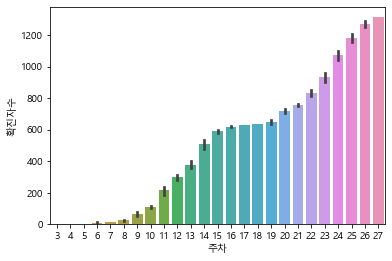

In [77]:
l1 = sns.barplot(x="주차", y="확진자수",data=grouped1)
# plt.title("서울시 주차별 코로나 확진자 변화")

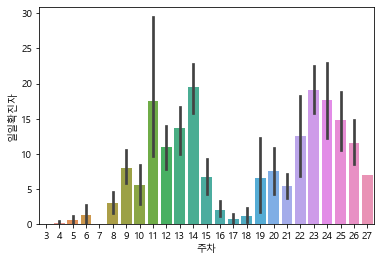

In [78]:
l2 = sns.barplot(x="주차", y="일일확진자",data=grouped1)

[(0, 27)]

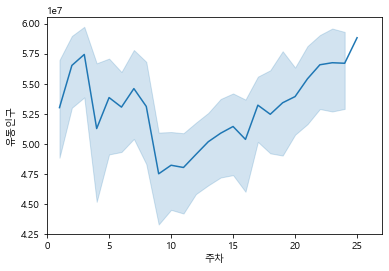

In [79]:
l3 = sns.lineplot(x="주차", y="유동인구",data=temp)
l3.set(xlim=(0, 27))

In [97]:
covidfpopl_df

,index,date,확진자수,일일확진자,주차,년월일,유동인구,일자
0,0,2020-01-20,0,0,3,20200114.0,58687051.0,14.0
1,0,2020-01-20,0,0,3,20200115.0,59028326.0,15.0
2,0,2020-01-20,0,0,3,20200116.0,59301598.0,16.0
3,0,2020-01-20,0,0,3,20200117.0,61384697.0,17.0
4,0,2020-01-20,0,0,3,20200118.0,57223784.0,18.0
...,...,...,...,...,...,...,...,...
1046,2686,2020-06-26,1267,17,26,NaN,NaN,NaN
1047,2703,2020-06-27,1284,17,26,NaN,NaN,NaN
1048,2720,2020-06-28,1298,14,26,NaN,NaN,NaN
1049,2737,2020-06-29,1305,7,26,NaN,NaN,NaN


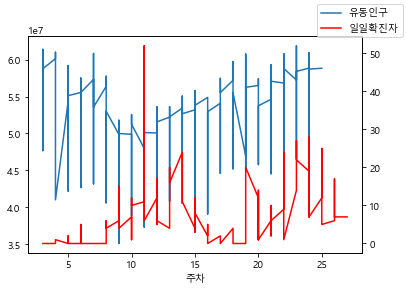

In [100]:
ax = covidfpopl_df.plot(x="주차", y="유동인구", legend=False)
ax2 = ax.twinx()
covidfpopl_df.plot(x="주차", y="일일확진자", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

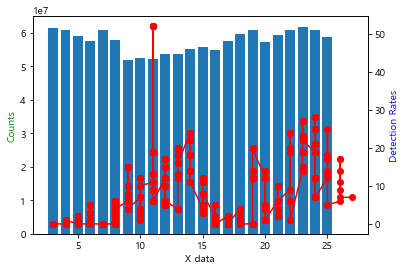

In [104]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(covidfpopl_df['주차'], covidfpopl_df['유동인구'])
ax2.plot(covidfpopl_df['주차'], covidfpopl_df['일일확진자'], 'o-', color="red" )

ax1.set_xlabel('X data')
ax1.set_ylabel('Counts', color='g')
ax2.set_ylabel('Detection Rates', color='b')

plt.show()

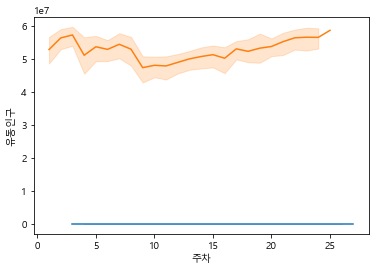

In [103]:
l1 = sns.lineplot(x="주차", y="일일확진자",data=grouped1)
l2 = sns.lineplot(x="주차", y="유동인구",data=temp)
plt.show()

### 가맹점 업종 코드, 구 별 매출 발생 건수를 그래프로 시각화

In [123]:
# 가맹점 업종 코드 별 각 구의 매출 발생 건수 합계

card_gu_pivot1=pd.pivot_table(card_gu, index='가맹점업종코드앞자리', columns='구', values='매출발생건수', aggfunc='sum')

In [124]:
card_gu_pivot1

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
가맹점업종코드앞자리,,,,,,,,,,,,,,,,,,,,,
1,1464470,31693,14242,758711,39022,195771,52528,25991,16947,6998,...,15915,15007,315206,452073,92953,43429,24640,79718,41345994,23164
2,1457961,582724,208367,640083,806491,585194,440882,282048,613687,268117,...,306915,412620,931103,449532,475430,530929,409894,404846,612916,400150
3,532682,185876,42653,449746,208474,336041,426418,334972,207664,209620,...,280674,446672,520674,337248,1270496,175485,256011,88627,312069,258355
4,37547905,6208346,2027223,12245286,8090786,5134596,38498146,5284084,5768857,3057588,...,4319787,4648477,10471387,11831269,10038008,52703563,5222978,3874081,31453594,4354291
5,935201,162045,32362,181529,372653,132603,243341,115976,218454,77068,...,152855,216798,298116,199316,218431,167034,140102,1192677,434807,90530
6,3769920,125322,25817,273440,39675,80447,941573,147640,54096,46585,...,375945,48607,361358,75947,1078345,408167,45555,5571594,1757403,44547
7,4521334,1684308,529838,1820369,1525855,1306960,1588344,824059,1569239,732179,...,926079,1154995,2816508,1340486,1842155,773614,1341004,1627348,1260992,1089355
8,18473343,5203573,1807479,6976096,6291168,5211558,5410284,3985826,4748921,2259867,...,4664436,4088921,9477096,4190947,8517904,5870548,4017636,7848965,15437742,3129882
9,5800001,406762,232737,593793,244148,326114,1065236,186875,330396,145035,...,345636,182163,631635,283882,629740,5333267,203184,654306,7320421,136268


In [125]:
# x축 : 각 업종 별 코드
# 1:'관광',2:'취미',3:'생활',4:'쇼핑',5:'교육',6:'차량',7:'의료',8:'음식',9:'기타'
# y축 : 업종 코드 별 각 구의 매출 발생 건수

card_gu_pivot1.iplot(kind='line')

### 카드 사용 접수 월 별 각 구의 매출 발생 건수를 그래프로 시각화 

In [127]:
# 카드사용 접수 일을 월별로 grouping
# 각 구 별로 매출 발생 건수를 value로 grouping

card_gu_pivot2=pd.pivot_table(card_gu, index='카드사용접수일', columns='구', values='매출발생건수', aggfunc='sum')
card_gu_pivot2

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
카드사용접수일,,,,,,,,,,,,,,,,,,,,,
01,11890505,2243566,752969,3957003,2942820,2202868,7809806,1796153,2156370,1033066,...,1730482,1740131,4276690,3148920,3754154,9806785,1879370,3903744,19653014,1508122
02,10607989,1958558,656233,3282732,2437286,1802197,6727556,1543124,1849240,909526,...,1571623,1498921,3573306,2650965,3299758,9017602,1557559,3272043,13740693,1273891
03,14399547,2868228,967828,4587210,3434597,2560642,9761422,2150956,2605530,1362367,...,2225794,2189270,4985424,3752071,4667322,14099344,2255283,3922384,17988601,1878997
04,14575330,2912666,974359,4718057,3428699,2589655,9750934,2230436,2633537,1355207,...,2305808,2227360,5067956,3658637,4814450,13081286,2294725,4146742,18707727,1871258
05,15673398,3150215,1073218,5054977,3664304,2843679,9930268,2352576,2904848,1467480,...,2420898,2407502,5426361,4079727,5159745,13426375,2508031,4427498,20296394,2045673
06,7356048,1457416,496111,2339074,1710566,1310243,4686766,1114226,1378736,675411,...,1133637,1151076,2493346,1870380,2468033,6574644,1166036,1669751,9549509,948601


In [128]:
# x축 : 카드 사용 접수 월 > 1~6월
# y축 : 카드사용 월 별 각 구의 매출 발생 건수

card_gu_pivot2.iplot(kind='line')

### 월별 매출 발생 건수 top3, botton3 구 그래프

In [130]:
# Top3 월별 매출 발생 건수

fig=go.Figure()

fig.add_trace(go.Funnel(
name='서초구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['서초구']))

fig.add_trace(go.Funnel(
name='중구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['중구']))

fig.add_trace(go.Funnel(
name='강남구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['강남구']))

fig.show()

In [132]:
# Botton 3 월별 매출 발생 건수

fig=go.Figure()

fig.add_trace(go.Funnel(
name='중랑구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['중랑구']))

fig.add_trace(go.Funnel(
name='도봉구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['도봉구']))

fig.add_trace(go.Funnel(
name='강북구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['강북구']))

fig.show()

In [133]:
# Top 3, Botton 3 월별 매출 발생 건수

fig=go.Figure()

fig.add_trace(go.Funnel(
name='서초구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['서초구']))

fig.add_trace(go.Funnel(
name='중구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['중구']))

fig.add_trace(go.Funnel(
name='강남구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['강남구']))

fig.add_trace(go.Funnel(
name='중랑구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['중랑구']))

fig.add_trace(go.Funnel(
name='도봉구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['도봉구']))

fig.add_trace(go.Funnel(
name='강북구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['강북구']))

fig.show()

In [134]:
# 가맹점 업종 코드를 앞에 2자리만 남기게 slicing
card_gu['가맹점업종코드두자리']=card_gu['가맹점업종코드'].str.slice(start=0, stop=2)

In [135]:
card_gu.가맹점업종코드두자리.unique()

array(['92', '83', '80', '70', '42', '40', '22', '71', '51', '44', '90',
       '50', '32', '20', '52', '91', '61', '99', '21', '93', '34', '10',
       '60', '30', '96', '11', '43', '84', '81', '82', '62', '33', '41',
       '31', '95'], dtype=object)

In [136]:
# 쇼핑과 관련된 가맹점 업종 코드에 해당되는 데이터 추출
card_shopping=card_gu[card_gu['가맹점업종코드두자리'].isin(['40','41','42','43','44'])]

In [137]:
# 각 쇼핑 가맹점 업종 코드 별 데이터 추출

card_shopping_40=card_shopping.loc[card_gu['가맹점업종코드두자리']=='40']
card_shopping_41=card_shopping.loc[card_gu['가맹점업종코드두자리']=='41']
card_shopping_42=card_shopping.loc[card_gu['가맹점업종코드두자리']=='42']
card_shopping_43=card_shopping.loc[card_gu['가맹점업종코드두자리']=='43']
card_shopping_44=card_shopping.loc[card_gu['가맹점업종코드두자리']=='44']

In [138]:
card_shopping_40.가맹점업종명.unique()

array(['슈퍼 마켓', '편 의 점', '상품권 전문판매', '인터넷Mall', '상품권', '대형할인점', '면 세 점',
       '인터넷종합Mall', '기타유통업', '연 쇄 점', '인터넷P/G', 'PG 상품권', '자사카드발행백화점',
       '전자상거래 상품권 전문판매', '전자상거래 상품권', '통신판매1', '일반백화점', '농축수산가공품',
       '통신판매2', 'CATV홈쇼핑'], dtype=object)

In [139]:
card_shopping_41.가맹점업종명.unique()

array(['공무원연금매점', '구내매점(국가기관등)', '기타비영리유통'], dtype=object)

In [140]:
card_shopping_42.가맹점업종명.unique()

array(['정장', '기타의류', '맞춤복 점', '내의판매점', '양 품 점', '단체복', '스포츠의류', '아동의류',
       '와이셔츠/타이', '캐쥬얼의류'], dtype=object)

In [141]:
card_shopping_44.가맹점업종명.unique()

array(['기타잡화', '기념품 점', '악세 사리', '신   발', '귀 금 속', '가   방', '제 화 점',
       '시   계', '성인용품점'], dtype=object)

### 정리
- 서초구를 제외한 거의 모든 구에서 '쇼핑' 부문에서 매출 건수가 가장 많은 것을 알 수 있음
- 거의 모든 구가 2월에 매출 건수가 가장 적으며, 5월에 가장 많은 매출 건수를 보임
- 코로나 감염으로 인해 비대면 서비스 수요가 증가했음을 알 수 있음
- 신천지 집단 감염이 발생한 2월부터 소비가 주춤한 것을 알 수 있음
- 신천지 집단 감염은 대구, 경북 지역에서 발생하였으나, 서울에서도 소비가 주춤한 것을 알 수 있음
- 고강도 사회적 거리두기 종료 시점인 5월에 가장 소비가 많은 것을 알 수 있음(6월 데이터는 완전하지 않으므로 해석에서 제외)
- 대부분의 회사 본사가 몰려있는 서초구, 강남구, 중구에서 가장 소비 건수가 많은 것을 알 수 있음
- 거의 주거지역이 몰려있으며 서울 외곽지역, 산이 있는 지역이 소비 건수가 적은 것을 알 수 있음

# Ⅲ 연구 결론(인사이트 도출)